In [13]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from MdpLibs.MdpSimulator import PolicySimulator 
from MdpLibs import encode_float_filename
from MdpLibs.MdpOptimizer import visualizeUtilityTable

In [14]:
lenWindow = 10
direction = "forward"
mode = "fixed"
dbParams = 0.01
#numAggregatedTraffic = 3
dbpString = encode_float_filename(dbParams)

for numAggregatedTraffic in [2,3]:
    markovFolder = f"../part02_build_markov/Results/MarkovModel"
    mdpFolder = f"Results/MdpPolicy/{direction}/{mode}_{dbpString}/{lenWindow}"
    with open(f"{markovFolder}/{direction}/{mode}_{dbpString}/{lenWindow}/{lenWindow}_to_{numAggregatedTraffic}.pkl", "rb") as file:
        aggregateMarkovModel = pickle.load(file)
    with open(f"{mdpFolder}/mdpParams_{lenWindow}_to_{numAggregatedTraffic}.pkl", "rb") as file:
        mdpParams = pickle.load(file)
    with open(f"{mdpFolder}/mdpSolver_{lenWindow}_to_{numAggregatedTraffic}.pkl", "rb") as file:
        mdpSolver = pickle.load(file)


    policySimulator = PolicySimulator(mdpSolver, mdpParams, aggregateMarkovModel)
    #visualizeUtilityTable(mdpSolver, dsiplay_step=2)

    simResultsMdp = policySimulator.simulation(policyType="mdp")
    simResultsConst = policySimulator.simulation(policyType="const")
    simResultsNp = policySimulator.simulation(policyType="np")
    print(f"Avg. Utiliy (Const): {np.mean(simResultsConst['simU_history'])}")
    print(f"Avg. Utiliy (NP): {np.mean(simResultsNp['simU_history'])}")
    print(f"Avg. Utiliy (Mdp): {np.mean(simResultsMdp['simU_history'])}")
    print(f"Avg. AoS  (Const): {np.mean(simResultsConst['simAoS_history'])}")
    print(f"Avg. AoS  (NP): {np.mean(simResultsNp['simAoS_history'])}")
    print(f"Avg. AoS  (Mdp): {np.mean(simResultsMdp['simAoS_history'])}")
    print(f"Max. AoS  (Const): {np.max(simResultsConst['simAoS_history'])}")
    print(f"Max. AoS  (NP): {np.max(simResultsNp['simAoS_history'])}")
    print(f"Max. AoS  (Mdp): {np.max(simResultsMdp['simAoS_history'])}")
    print(f"Avg. cost (Const): {np.mean(simResultsConst['simCostWindow_history'])}")
    print(f"Avg. cost (NP): {np.mean(simResultsNp['simCostWindow_history'])}")
    print(f"Avg. cost (Mdp): {np.mean(simResultsMdp['simCostWindow_history'])}")

Avg. Utiliy (Const): 0.9892030485436893
Avg. Utiliy (NP): 0.9893103689320388
Avg. Utiliy (Mdp): 0.9875570291262136
Avg. AoS  (Const): 1.9677669902912622
Avg. AoS  (NP): 3.026407766990291
Avg. AoS  (Mdp): 0.2638834951456311
Max. AoS  (Const): 23
Max. AoS  (NP): 24
Max. AoS  (Mdp): 4
Avg. cost (Const): 0.9999999776482582
Avg. cost (NP): 0.8986246032929681
Avg. cost (Mdp): 1.0579352740297836
Avg. Utiliy (Const): 0.989205145631068
Avg. Utiliy (NP): 0.9892446019417478
Avg. Utiliy (Mdp): 0.9693239805825241
Avg. AoS  (Const): 1.9677669902912622
Avg. AoS  (NP): 3.026407766990291
Avg. AoS  (Mdp): 0.36893203883495146
Max. AoS  (Const): 23
Max. AoS  (NP): 24
Max. AoS  (Mdp): 3
Avg. cost (Const): 0.9999999776482582
Avg. cost (NP): 0.8986246032929681
Avg. cost (Mdp): 1.0184271521775903


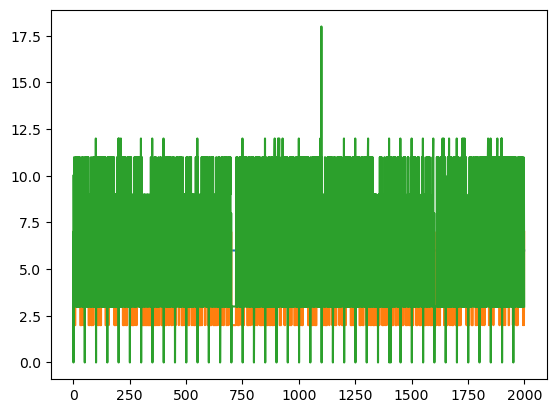

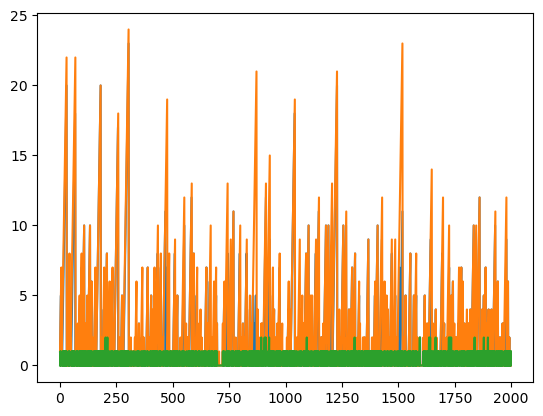

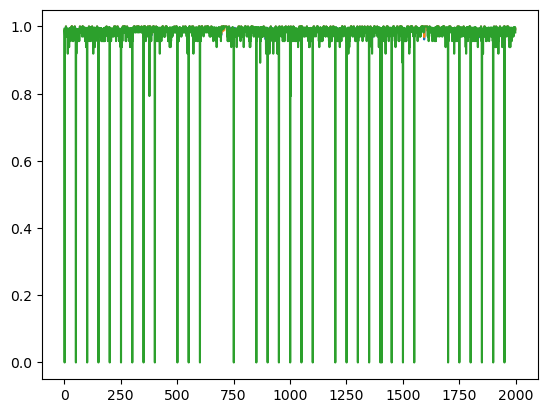

In [15]:
idx_obv = 2000

plt.plot(simResultsConst['simX_history'][0:idx_obv] + simResultsConst['simY_history'][0:idx_obv])
plt.plot(simResultsNp['simX_history'][0:idx_obv] + simResultsNp['simY_history'][0:idx_obv])
plt.plot(simResultsMdp['simX_history'][0:idx_obv] + simResultsMdp['simY_history'][0:idx_obv])
plt.show()

plt.plot(simResultsConst['simAoS_history'][0:idx_obv])
plt.plot(simResultsNp['simAoS_history'][0:idx_obv])
plt.plot(simResultsMdp['simAoS_history'][0:idx_obv])
plt.show()

plt.plot(simResultsConst['simU_history'][0:idx_obv])
plt.plot(simResultsNp['simU_history'][0:idx_obv])
plt.plot(simResultsMdp['simU_history'][0:idx_obv])
plt.show()


In [16]:
'''

avgUtilityList.append(np.mean(simResults['simU_history']))
avgAosList.append(np.mean(simResults['simAoS_history']))
maxAosList.append(np.max(simResults['simAoS_history']))
estAccList.append(simResults['estAccuracy'])
compressionRateList.append(numAggregatedTraffic / (lenWindow))
print(f"Avg. Utiliy (Const): {np.mean(simResultsConst['simU_history'])}")
print(f"Avg. Utiliy (NP): {np.mean(simResultsNp['simU_history'])}")
print(f"Avg. Utiliy (Mdp): {np.mean(simResults['simU_history'])}")
print(f"Avg. AoS  (Const): {np.mean(simResultsConst['simAoS_history'])}")
print(f"Avg. AoS  (NP): {np.mean(simResultsNp['simAoS_history'])}")
print(f"Avg. AoS  (Mdp): {np.mean(simResults['simAoS_history'])}")
print(f"Max. AoS  (Const): {np.max(simResultsConst['simAoS_history'])}")
print(f"Max. AoS  (NP): {np.max(simResultsNp['simAoS_history'])}")
print(f"Max. AoS  (Mdp): {np.max(simResults['simAoS_history'])}")
print(f"Avg. cost (Const): {np.mean(simResultsConst['simCostWindow_history'])}")
print(f"Avg. cost (NP): {np.mean(simResultsNp['simCostWindow_history'])}")
print(f"Avg. cost (Mdp): {np.mean(simResults['simCostWindow_history'])}")
    

saveFolder = f"Results/MdpEvaluation/{direction}/{mode}_{dbpString}/{lenWindow}"
if os.path.exists(saveFolder) == False:
    os.makedirs(saveFolder)
with open(f"{saveFolder}/{lenWindow}_to_{numAggregatedTraffic}_simResultsMdp.pkl", "wb") as file:
    pickle.dump(simResults, file)
with open(f"{saveFolder}/{lenWindow}_to_{numAggregatedTraffic}_simResultsConst.pkl", "wb") as file:
    pickle.dump(simResultsConst, file)
with open(f"{saveFolder}/{lenWindow}_to_{numAggregatedTraffic}_simResultsNp.pkl", "wb") as file:
    pickle.dump(simResultsNp, file)

if verbose == True:
    idx_obv = 200
    plt.plot(simResultsConst['simU_history'][0:idx_obv])
    plt.plot(simResultsNp['simU_history'][0:idx_obv])
    plt.plot(simResults['simU_history'][0:idx_obv])

    plt.plot(mdpParams['utility_ref']*np.ones_like(simResults['simU_history'][0:idx_obv]))
    plt.show()
    plt.plot(simResultsConst['simAoS_history'][0:idx_obv])
    plt.plot(simResultsNp['simAoS_history'][0:idx_obv])
    plt.plot(simResults['simAoS_history'][0:idx_obv])
    plt.show()
'''




'\n\navgUtilityList.append(np.mean(simResults[\'simU_history\']))\navgAosList.append(np.mean(simResults[\'simAoS_history\']))\nmaxAosList.append(np.max(simResults[\'simAoS_history\']))\nestAccList.append(simResults[\'estAccuracy\'])\ncompressionRateList.append(numAggregatedTraffic / (lenWindow))\nprint(f"Avg. Utiliy (Const): {np.mean(simResultsConst[\'simU_history\'])}")\nprint(f"Avg. Utiliy (NP): {np.mean(simResultsNp[\'simU_history\'])}")\nprint(f"Avg. Utiliy (Mdp): {np.mean(simResults[\'simU_history\'])}")\nprint(f"Avg. AoS  (Const): {np.mean(simResultsConst[\'simAoS_history\'])}")\nprint(f"Avg. AoS  (NP): {np.mean(simResultsNp[\'simAoS_history\'])}")\nprint(f"Avg. AoS  (Mdp): {np.mean(simResults[\'simAoS_history\'])}")\nprint(f"Max. AoS  (Const): {np.max(simResultsConst[\'simAoS_history\'])}")\nprint(f"Max. AoS  (NP): {np.max(simResultsNp[\'simAoS_history\'])}")\nprint(f"Max. AoS  (Mdp): {np.max(simResults[\'simAoS_history\'])}")\nprint(f"Avg. cost (Const): {np.mean(simResultsConst